![](./data/me.png)

### Задачи
- Получить изображение, на котором присутствуют искажения пространства, например, квадрат превращается в трапецию при фотографии с определенного угла.

- Провести проективное преобразование более сложного объекта, чем квадрат. В результате обработки изображения получить неискаженное изображение объекта.


### Сфера

- Данная задача относится к оптике. Происходит преобразование трёхмерного объекта в двухмерную проекцию и наоборот

### Гомография

- Гомография — перспективное преобразование плоскости.

- Гомография — это преобразование, которое отображает точки одного изображения в точки соответствия другого изображения.

- Гомография - частный случай модели фундаментальных проективных преобразований, когда объекты сцены находятся в плоскостях (z = 0).

- **Cartesian $\rightarrow$ homogeneus:**

> $P = (x, y) \ \ \ P \in \mathbb{R}^2$
>
> $\tilde P = (x, y, 1) \ \ \tilde P \in \mathbb{P}^2$

- **homogeneous $\rightarrow$ Cartesian:**

> $\tilde P = (\tilde x, \tilde y, \tilde z) $
>
> $ P = (x, y) $
>
> $ x = {\tilde x \over \tilde z}, \  y = {\tilde y \over \tilde z}$

**Pin-hole model in homogeneous form:**

\begin{equation*}
\displaystyle
\begin{pmatrix}
\tilde x \\
\tilde y \\
\tilde z \\
\end{pmatrix}
=
\displaystyle
\begin{pmatrix}
f & 0 & 0 & 0 \\
0 & f & 0 & 0 \\
0 & 0 & 1 & 0 \\
\end{pmatrix}
\displaystyle
\begin{pmatrix}
X \\
Y \\
Z \\
1 \\
\end{pmatrix}
\end{equation*}

> $\displaystyle \tilde x = fX, \tilde y = fY, \tilde z = Z$
> 
> $\ \ \ \displaystyle x = {\tilde x \over \tilde z}, \  y = {\tilde y \over \tilde z}$
> 
> $\ \ \ \Rightarrow x = {fX \over Z}, y = {fY \over Z}$

 \begin{pmatrix}
  f & 0 & 0 & 0 \\
  0 & f & 0 & 0 \\
  0 & 0 & 1 & 0 \\
 \end{pmatrix}
 
> - A multiplication of two other matrix: 3D $\rightarrow$ 2D and scaling / zooming matrix

\begin{equation*}
\displaystyle
\begin{pmatrix}
  \tilde u \\
  \tilde v \\
  \tilde w \\
\end{pmatrix}
=
\displaystyle
\begin{pmatrix}
 {1 \over p_u} & 0 & u_0 \\
 0 & {1 \over p_v} & v_0 \\
 0 & 0 & 1 \\
\end{pmatrix}
\displaystyle
\begin{pmatrix}
 \tilde x \\
 \tilde y \\
 \tilde z \\
\end{pmatrix}
\end{equation*}

> - Scale from meters to pixels:
> - Shift origin to left side

**Complete camera model:**

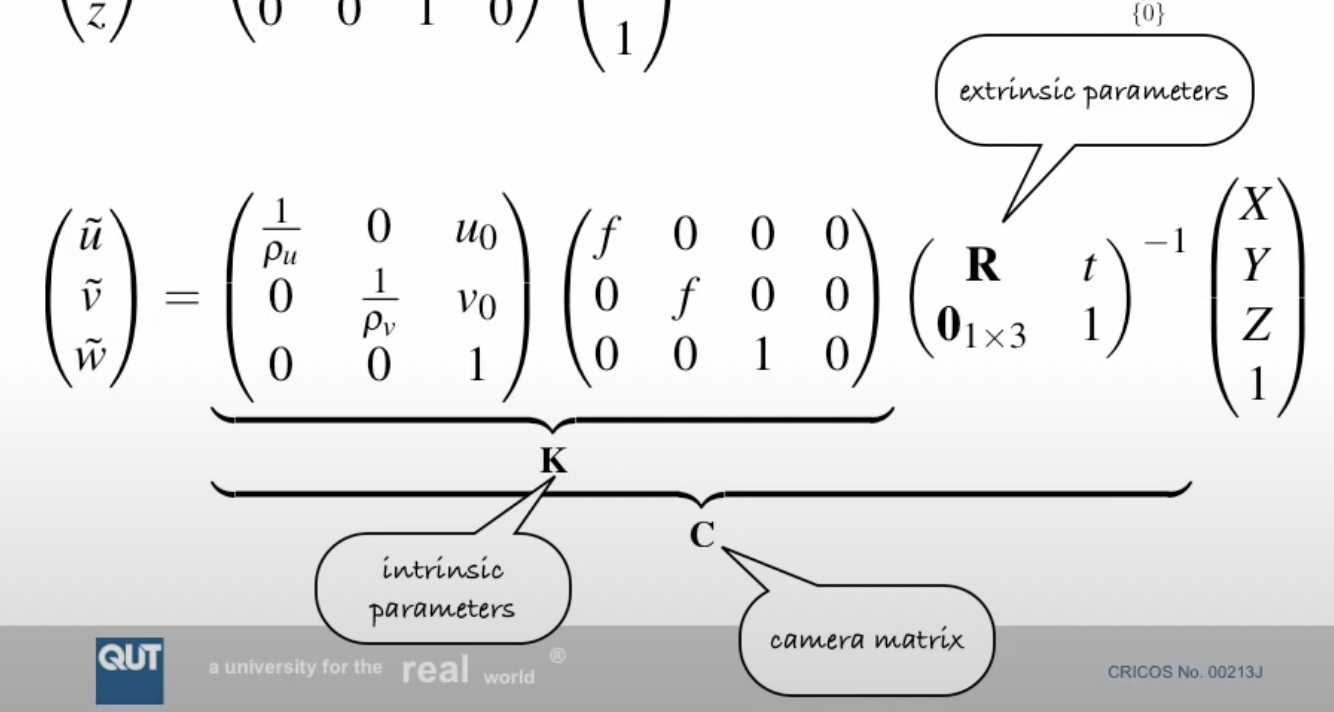

**Scale invariance:**

\begin{equation*}
\displaystyle
\begin{pmatrix}
  \tilde u \\
  \tilde v \\
  \tilde w \\
\end{pmatrix}
=
\lambda \ \cdot \ ...
\end{equation*}

> $\tilde u, \tilde v, \tilde w$ will be scaled by $\lambda$
>
> but $\displaystyle u = {\tilde u \over \tilde w}, v = {\tilde v \over w}$

**Normalized camera matrix:**

> We can value of one element for example $C_{34}$

**Points on plane**

\begin{equation*}
\begin{pmatrix}
 \tilde u \\
 \tilde v \\
 \tilde w \\
\end{pmatrix}
=
\begin{pmatrix}
\displaystyle
 C_{11} & C_{12} &  & C_{14} \\
 C_{21} & C_{22} &  & C_{24} \\
 C_{31} & C_{32} &  & C_{34} \\
 C_{41} & C_{42} &  & 1 \\
\end{pmatrix}
\begin{pmatrix}
 X \\
 Y \\
 0 \\
 1 \\
\end{pmatrix}
\end{equation*}

> All points on the plane have $Z = 0 \rightarrow$ we can remove a row

**Planar homography:**

\begin{equation*}
\begin{pmatrix}
\tilde u \\
\tilde v \\
\tilde w \\
\end{pmatrix}
=
\begin{pmatrix}
h_{00} & h_{12} & h_{13} \\
h_{21} & h_{22} & h_{23} \\
h_{31} & h_{32} & 1 \\
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
1 \\
\end{pmatrix}
\end{equation*}

> - 8 unique numbers in homography matrix
>
> - Can be estimated from 4 world points and their corresponding image poins

In [5]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

img_points = []
upd_img_points = []

def img_pick(event, x, y, flags, params):
    global img_points
    if event == cv2.EVENT_LBUTTONDOWN:
        img_points.clear() if len(img_points) >= 4 else img_points.append((x, y))


def upd_img_pick(event, x, y, flags, params):
    global upd_img_points
    if event == cv2.EVENT_LBUTTONDOWN:
        upd_img_points.clear() if len(upd_img_points) >= 4 else upd_img_points.append((x, y))


def print_points(points_lst, picture):
    radius, color, thickness = 3, (0, 0, 255), -1
    for point in points_lst:
        cv2.circle(picture, point, radius, color, thickness)


def show_results(*args):
    plt.rcParams["figure.figsize"] = [10.00, 5.00]
    plt.rcParams["figure.autolayout"] = True
    for i in range(len(args)):
        arg = cv2.cvtColor(args[i], cv2.COLOR_BGR2RGB)
        plt.subplot(1, len(args), i + 1)
        plt.axis('off')
        plt.imshow(arg)
    plt.show()

In [6]:
def run(input_img):
    output_img = input_img.replace(os.path.basename(input_img), '_out.'.join(os.path.basename(input_img).split('.')))

    cv2.namedWindow(input_img)
    cv2.setMouseCallback(input_img, img_pick)
    cv2.namedWindow(output_img)
    cv2.setMouseCallback(output_img, upd_img_pick)

    img = cv2.imread(input_img)
    upd_img = np.zeros(img.shape, dtype=np.uint8)
    last_upd_img = upd_img.copy()

    while True:
        img_copy = img.copy()
        upd_img_copy = upd_img.copy()
        print_points(img_points, img_copy)
        print_points(upd_img_points, upd_img_copy)

        if len(img_points) == len(upd_img_points) == 4:
            homography = cv2.findHomography(np.array(img_points), np.array(upd_img_points))
            upd_img_copy = cv2.warpPerspective(img_copy, homography[0], (upd_img_copy.shape[1], upd_img_copy.shape[0]))
            last_upd_img = upd_img_copy

        cv2.imshow(input_img, img_copy)
        cv2.imshow(output_img, upd_img_copy)

        if cv2.waitKey(1) == 27:  
            show_results(*[img, last_upd_img])
            cv2.destroyAllWindows()
            img_points.clear()
            upd_img_points.clear()
            break
            

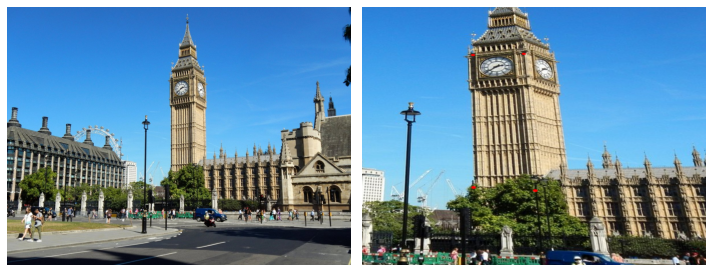

In [92]:
run('./data/building.png')

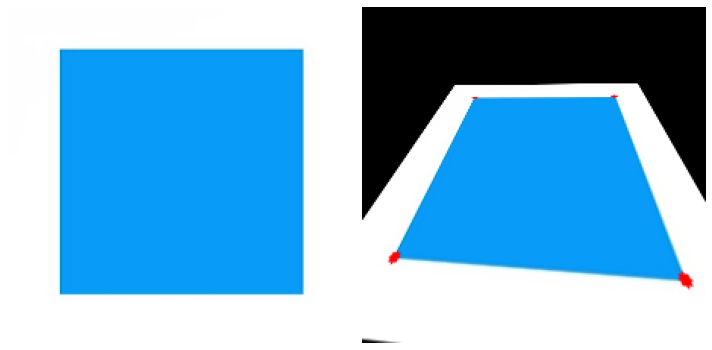

In [94]:
run('./data/square.png')

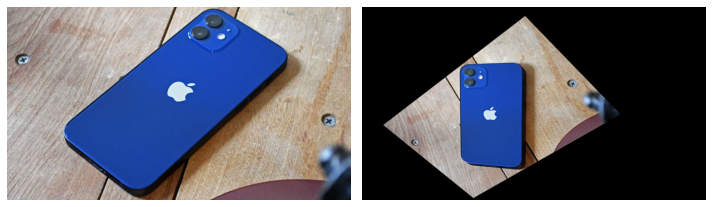

In [7]:
run('./data/iphone.png')

- Полученная картинка является ровной лишь приблизительно
- Это связано с тем, что у нас нет полного 3D изображения, то есть какие-то детали, которые видно с другой точки зрения, просто отсутствуют на нашем исходном изображении.
